# Predicting Churn with various Models


## Table of Contents
* [Importing Libraries and Dataset](#import)
* [Splitting into train and test and Standardize the data](#split)
* [Principal Component Analysis](#pca)
* [Building Models](#models)
> * [Logistic Regression](#lr)
> * [KNN](#knn)
> * [Random Forest](#rfc)
> * [Support Vector Machine](#svm)
> * [Naive Bayes](#nbc)
* [Comparing Models](#compare)

<a id="import"></a>

### 1. Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc


In [2]:
dataset = pd.read_csv('Telco-Customer-Churn_2.csv',index_col=[0])
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,Churn,InternetService#DSL,InternetService#Fiber optic,Contract#Month-to-month,Contract#One year,PaymentMethod#Bank transfer (automatic),PaymentMethod#Credit card (automatic),PaymentMethod#Electronic check
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,29.85,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,...,0.0,56.95,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,1.0,53.85,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,1.0,...,0.0,42.30,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,1.0,70.70,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,0.0,1.0,...,1.0,84.80,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7039,0.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,1.0,...,1.0,103.20,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7040,0.0,0.0,1.0,1.0,11.0,0.0,0.0,1.0,0.0,0.0,...,1.0,29.60,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7041,1.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,...,1.0,74.40,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


<a id="split"></a>

### 2. Splitting into train and test and Standardize the data

Spliting the Independent and Dependent variables

In [3]:
y = dataset.Churn.values
X = dataset.drop(['Churn'],axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


<a id="pca"></a>

### 3. Principal Component Analysis 
Surprisingly, PCA reveals that almost all the components are needed to define maximum variance in the data.
We can reduce dimensionality by setting the n_components to around 20 and transforming our train and test sets. I chose to continue with the default set of components.

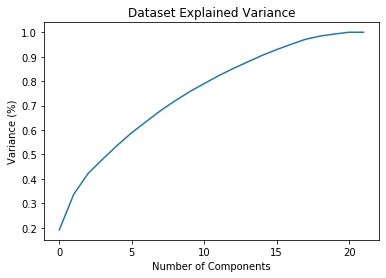

In [6]:
pca = PCA(n_components =None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()


<a id="models"></a>

## 4. Building Models

<a id="lr"></a>

### 4.1 Logistic Regression 

#### 4.1.1 Recursive Feature Elimination
Selecting minimum number of features which give the maximum cross val accuracy.

Optimal number of features : 17


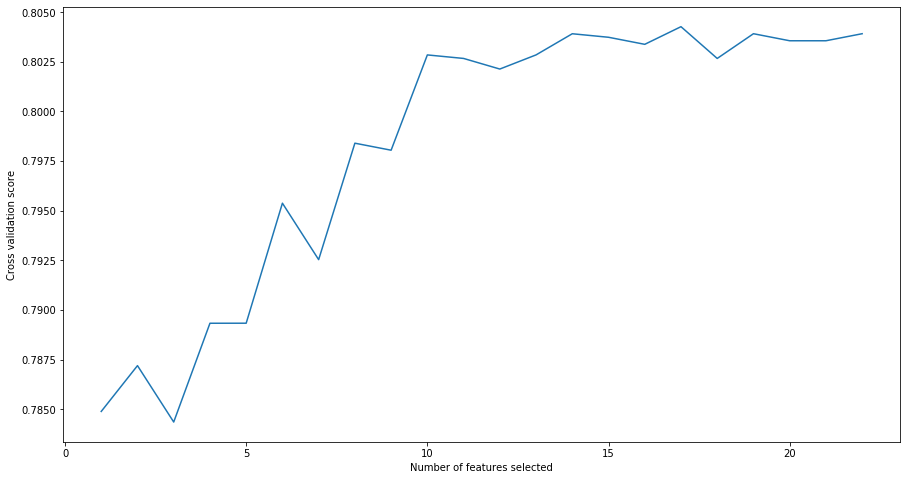

Index(['gender', 'SeniorCitizen', 'Partner', 'tenure', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'InternetService#DSL',
       'InternetService#Fiber optic', 'Contract#Month-to-month',
       'Contract#One year', 'PaymentMethod#Credit card (automatic)',
       'PaymentMethod#Electronic check'],
      dtype='object')


In [7]:
lr= LogisticRegression(penalty='l2',C=.1,solver='newton-cg',random_state=0)
selector = RFECV(estimator = lr ,step =1 , cv=StratifiedKFold(10),scoring='accuracy')
selector.fit(X_train,y_train)
print("Optimal number of features : %d" % selector.n_features_)
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()
#classifier.fit(X_train, y_train)
selected = X.columns[(selector.get_support())]
print(selected)
X_opt = selector.transform(X_train)
X_t_opt = selector.transform(X_test)

#### 4.1.2 Grid Search

In [8]:
lr = LogisticRegression(random_state=0)
parameters = [{'penalty':['l2'], 'solver': ['newton-cg','lbfgs','sag','saga'],'C': [0.001,0.009,0.01,0.09,1,5,10,25],
               'class_weight':['balanced','dict']},
            {'penalty':['l1'],'solver':['liblinear','saga'],'C': [0.001,0.009,0.01,0.09,1,5,10,25]}]
grid_search = GridSearchCV(estimator = lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_opt, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy "+str(best_accuracy))
print("Best Parameters "+str(best_parameters))


Best Accuracy 0.8048
Best Parameters {'C': 25, 'class_weight': 'dict', 'penalty': 'l2', 'solver': 'newton-cg'}


#### 4.1.3 Fitting the model

In [9]:
lr = LogisticRegression(penalty='l2',C=25,random_state=0,class_weight='dict',solver='newton-cg')
lr.fit(X_opt,y_train)
y_pred = lr.predict(X_t_opt)
train = round((lr.score(X_opt,y_train))*100,1)
test = round((lr.score(X_t_opt,y_test))*100,1)
print("training accuracy " + str(train))
print("testing accuracy " + str(test))

training accuracy 80.6
testing accuracy 79.2


#### 4.1.4 Cross Validation

In [10]:
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[920 113]
 [180 194]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1033
         1.0       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Cross Validation Score 80.44506109239397


<a id="knn"></a>

### 4.2 K Neighbors Classifier

#### 4.2.1 Grid Search

In [11]:
knn = KNeighborsClassifier()
parameters = [{'n_neighbors': [2,5, 10, 15, 20], 'weights': ['uniform','distance'],
               'p' :[1,2,3],'metric':['minkowski','euclidean','manhattan']}]
grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy "+str(best_accuracy))
print("Best Parameters "+str(best_parameters))

Best Accuracy 0.7925333333333333
Best Parameters {'metric': 'minkowski', 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}


#### 4.2.2 Fitting the model

In [12]:
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=20,p=2,weights='uniform')
knn.fit(X_train, y_train)
train = round((knn.score(X_train,y_train))*100,1)
test = round((knn.score(X_test,y_test))*100,1)
y_pred = knn.predict(X_test)
print("training accuracy " + str(train))
print("testing accuracy" + str(test))

training accuracy 80.8
testing accuracy76.6


#### 4.2.3 Cross Validation

In [13]:
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[894 139]
 [190 184]]
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      1033
         1.0       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407

Cross Validation Score 79.25361718804321


<a id="rfc"></a>

### 4.3 Random Forest Classifier

#### 4.3.1 Random Forest Feature Selection
Achieves maximum dimensionality reduction with a minor compromise in accuracy.

In [14]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train,y_train)
importances = rfc.feature_importances_
f_importances = pd.Series(importances, X.columns)
f_importances.sort_values(ascending=False, inplace=True)
f_importances
feat_labels = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharges','InternerService#DSL',
               'InternetService#Fiber optic','Contract#Month-to-month','Contract#One year','PaymentMethod#Bank transfer','PaymentMethod#Credit card',
               'PaymentMethod#Electronic check']
sfm = SelectFromModel(rfc, threshold=0.06)
sfm.fit(X_train, y_train)
print("Important Features")
for feature_list_index in sfm.get_support(indices=True):
    print("Feature "+ str(feature_list_index) + " : " + feat_labels[feature_list_index])
X_rfc_opt = sfm.transform(X_train)
X_t_rfc_opt = sfm.transform(X_test)

Important Features
Feature 1 : SeniorCitizen
Feature 2 : Partner


#### 4.3.2 Fitting the model

In [15]:
rfc = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
#classifier = RandomForestClassifier(random_state=0,n_estimators=1000,criterion="gini")
rfc.fit(X_rfc_opt, y_train)
train = round((rfc.score(X_rfc_opt,y_train))*100,1)
test = round((rfc.score(X_t_rfc_opt,y_test))*100,1)
y_pred = rfc.predict(X_t_rfc_opt)
print("training accuracy " + str(train))
print("testing accuracy" + str(test))


training accuracy 99.7
testing accuracy75.1


#### 4.3.3 Cross Validation

In [16]:
accuracies = cross_val_score(estimator = rfc, X = X_rfc_opt, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[886 147]
 [204 170]]
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83      1033
         1.0       0.54      0.45      0.49       374

    accuracy                           0.75      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.74      0.75      0.74      1407

Cross Validation Score 75.64445680549674


<a id="svm"></a>

### 4.4 Kernel SVM

#### 4.4.1 Fitting the model

In [17]:
svm = SVC(kernel='rbf',random_state=0,probability=True,gamma='auto').fit(X_train,y_train)
y_pred = svm.predict(X_test)
train = round((svm.score(X_train,y_train))*100,1)
test = round((svm.score(X_test,y_test))*100,1)
print("training accuracy " + str(train))
print("testing accuracy" + str(test))


training accuracy 82.3
testing accuracy78.0


#### 4.4.2 Cross Validation

In [18]:
accuracies = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[919 114]
 [195 179]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      1033
         1.0       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Cross Validation Score 80.03577681839155


<a id="nbc"></a>

### 4.5 Gaussian Naive Bayes

#### 4.5.1 Fitting the model

In [19]:
nbc = GaussianNB().fit(X_train,y_train)
y_pred = nbc.predict(X_test)
train = round((nbc.score(X_train,y_train))*100,1)
test = round((nbc.score(X_test,y_test))*100,1)
print("training accuracy " + str(train))
print("testing accuracy" + str(test))


training accuracy 79.1
testing accuracy77.1


#### 4.5.2 Cross Validation

In [20]:
accuracies = cross_val_score(estimator = nbc, X = X_train, y = y_train, cv = 10)

cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)
print("Cross Validation Score " + str(accuracies.mean()*100))

[[886 147]
 [175 199]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1033
         1.0       0.58      0.53      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407

Cross Validation Score 78.98690290323192


<a id="compare"></a>

## 5. Comparing Models

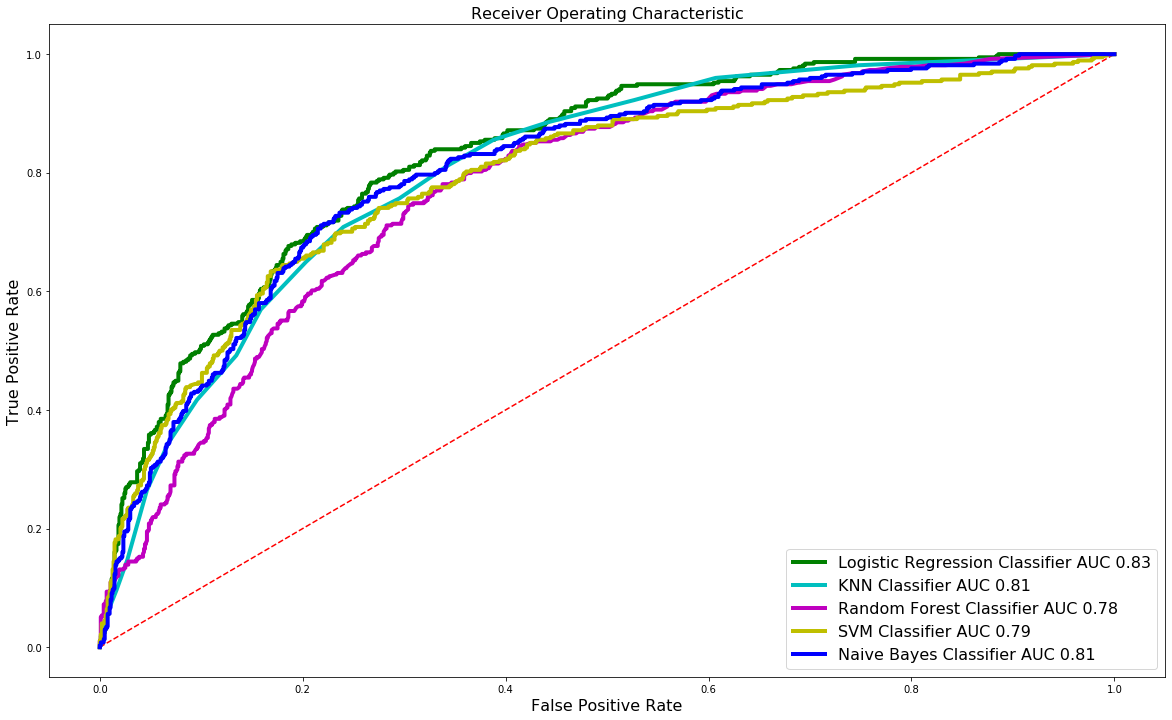

In [21]:
plt.figure(figsize=(20,12))
plt.plot([0,1],[0,1],'r--')
# LR
probs = lr.predict_proba(X_t_opt)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label_ = 'Logistic Regression Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='g',label=label_, linewidth =4)
# KNN
probs = knn.predict_proba(X_test)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label = 'KNN Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='c',label=label, linewidth =4)
# RFC
probs = rfc.predict_proba(X_t_rfc_opt)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label = 'Random Forest Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='m',label=label, linewidth =4)
# SVM
probs = svm.predict_proba(X_test)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label = 'SVM Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='y',label=label, linewidth =4)
# NB
probs = nbc.predict_proba(X_test)
probs = probs[:,1]
fpr, tpr , thresholds = roc_curve(y_test,probs)
roc_auc = auc(fpr,tpr)
label = 'Naive Bayes Classifier AUC '+'{0:.2f}'.format(roc_auc)
plt.plot(fpr,tpr,c='b',label=label, linewidth =4)

plt.xlabel('False Positive Rate',fontsize = 16)
plt.ylabel('True Positive Rate',fontsize = 16)
plt.title('Receiver Operating Characteristic',fontsize = 16)
plt.legend(loc='lower right',fontsize = 16)
